In [1]:
import datetime
import time as time_module
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm

try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'


INFO: This code is not longer developed, use our new module instead: github.com/Priesemann-Group/covid19_inference


In [2]:

confirmed_cases = cov19.get_jhu_confirmed_cases()



country = 'Germany'
date_data_begin = datetime.datetime(2020,3,1)
date_data_end   = datetime.datetime(2020,4,21)
# date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 28
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,9)
prior_date_strong_dist_begin =  datetime.datetime(2020,3,16)
prior_date_contact_ban_begin =  datetime.datetime(2020,3,23)

change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                      pr_sigma_date_begin_transient = 3,
                      pr_median_lambda = 0.2,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 1/8/2,
                      pr_sigma_lambda = 0.5),
                 dict()
                ]

traces = []
models = []
date_end_data_list = [datetime.datetime(2020,3,18), datetime.datetime(2020,3,25),datetime.datetime(2020,4,1),
                      datetime.datetime(2020,4,9), date_data_end]

for num_change_points in range(0,5):
    num_days_data = int((date_end_data_list[num_change_points] - date_data_begin).days +1)
    new_cases_obs = np.diff(cases_obs[:num_days_data])
    model = cov19.SIR_with_change_points(new_cases_obs,
                                        change_points_list = change_points[:num_change_points]\
                                        if num_change_points < 4 else change_points[:-1],
                                        date_begin_simulation = date_begin_sim,
                                        num_days_sim = num_days_sim,
                                        diff_data_sim = diff_data_sim,
                                        N = 83e6,
                                        priors_dict=None,
                                        weekends_modulated=True,
                                        weekend_modulation_type = 'abs_sine',
                                    )
    models.append(model)
    traces.append(pm.sample(model=model, init='advi', draws=1000))

Cases yesterday (2020-04-21T00:00:00): 148291 and day before yesterday: 147065
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
week_end_days was set to default value (6, 7)
pr_mean_weekend_factor was set to default value 0.7
pr_sigma_weekend_factor was set to default value 0.17


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 139.04:   6%|▌         | 11361/200000 [00:24<06:48, 461.76it/s]
Convergence achieved at 11400
Interrupted at 11,399 [5%]: Average Loss = 170.79
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [offset_modulation_rad, weekend_factor, sigma_obs, delay, mu, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [04:35<00:00, 21.80draws/s]


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
week_end_days was set to default value (6, 7)
pr_mean_weekend_factor was set to default value 0.7
pr_sigma_weekend_factor was set to default value 0.17
pr_median_transient_len of change point 0 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 208.96:   7%|▋         | 14089/200000 [00:31<06:58, 443.83it/s]
Convergence achieved at 14100
Interrupted at 14,099 [7%]: Average Loss = 257.03
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [offset_modulation_rad, weekend_factor, sigma_obs, delay, mu, transient_len_0, transient_begin_0, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [04:16<00:00, 23.40draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
week_end_days was set to default value (6, 7)
pr_mean_weekend_factor was set to default value 0.7
pr_sigma_weekend_factor was set to default value 0.17
pr_median_transient_len of change point 1 was set to default value 3
pr_sigma_transient_len of change point 1 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 283.18:   8%|▊         | 15755/200000 [00:35<06:51, 447.55it/s]
Convergence achieved at 15800
Interrupted at 15,799 [7%]: Average Loss = 350.83
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [offset_modulation_rad, weekend_factor, sigma_obs, delay, mu, transient_len_1, transient_len_0, transient_begin_1, transient_begin_0, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [05:34<00:00, 17.95draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
week_end_days was set to default value (6, 7)
pr_mean_weekend_factor was set to default value 0.7
pr_sigma_weekend_factor was set to default value 0.17
pr_median_transient_len of change point 2 was set to default value 3
pr_sigma_transient_len of change point 2 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 364.15:   8%|▊         | 16268/200000 [00:36<06:54, 443.66it/s]
Convergence achieved at 16300
Interrupted at 16,299 [8%]: Average Loss = 454.99
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [offset_modulation_rad, weekend_factor, sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [07:42<00:00, 12.97draws/s]
The number of effective samples is smaller than 25% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
week_end_days was set to default value (6, 7)
pr_mean_weekend_factor was set to default value 0.7
pr_sigma_weekend_factor was set to default value 0.17


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 469.69:   9%|▉         | 18788/200000 [00:44<07:08, 422.67it/s]
Convergence achieved at 18800
Interrupted at 18,799 [9%]: Average Loss = 588.61
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [offset_modulation_rad, weekend_factor, sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [07:51<00:00, 12.73draws/s]
The number of effective samples is smaller than 25% for some parameters.


Plots with data from 2020-03-01 to 2020-04-21
Daily new cases now for   zero change points :4.49e+06 95% CI: [2e+06 5.29e+06]
Daily new cases now for   one change point :6.39e+04 95% CI: [1.44e+04 1.91e+05]
Daily new cases now for   two change points :1.15e+04 95% CI: [4.1e+03 2.49e+04]
Daily new cases now for   three change points :4.56e+03 95% CI: [3.05e+03 6.34e+03]
Daily new cases now for best estimate :2.38e+03 95% CI: [1.86e+03 2.94e+03]
Cumulative cases now for   zero change points :4.63e+07 95% CI: [2.14e+07 6.65e+07]
Cumulative cases now for   one change point :6.64e+05 95% CI: [2.47e+05 1.52e+06]
Cumulative cases now for   two change points :2.44e+05 95% CI: [1.62e+05 3.7e+05]
Cumulative cases now for   three change points :1.73e+05 95% CI: [1.59e+05 1.89e+05]
Cumulative cases now for best estimate :1.51e+05 95% CI: [1.5e+05 1.51e+05]


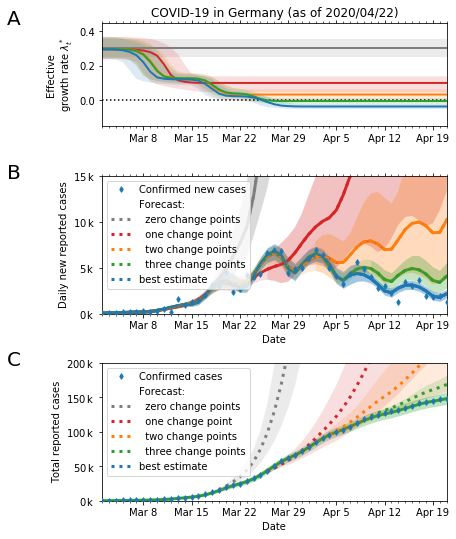

In [16]:
# date_format = "%m/%d"  # 04/01
date_format = "%b %-d"  # Apr 1
# date_format = "%-d. %B" # 1. April


num_days_data_list=[]
for num_change_points in range(0,5):
    num_days_data = int((date_end_data_list[num_change_points] - date_data_begin).days +1)
    num_days_data_list.append(num_days_data)

for num_change_points in range(0,5):
    num_days_data = int((date_end_data_list[num_change_points] - date_data_begin).days)

def truncate_number(number, precision):
    return '{{:.{}f}}'.format(precision).format(number)

def print_median_CI(arr, prec = 2):
    f_trunc = lambda n: truncate_number(n, prec)
    med = f_trunc(np.median(arr))
    perc1, perc2 = f_trunc(np.percentile(arr, q=2.5)), f_trunc(np.percentile(arr, q=97.5))
    return 'Median: {}\n95% CI: [{}, {}]'.format(med, perc1, perc2)
def conv_time_to_mpl_dates(arr):
    return matplotlib.dates.date2num([datetime.timedelta(days=float(date)) + date_begin_sim for date in arr])

print("Plots with data from {} to {}".format(date_data_begin.date().isoformat(), date_data_end.date().isoformat()))


trace = traces[4]
posterior = traces[:]
end_date = matplotlib.dates.date2num(datetime.datetime(2020,4,21))

diff_to_0 = num_days_data + diff_data_sim

fig, axes = plt.subplots(3,1, figsize=(6.5,7.5), gridspec_kw={'height_ratios': [1.5, 2,2]})

colors  = ['tab:gray', 'tab:red', 'tab:orange', 'tab:green', 'tab:blue']
legends = ['Forecast: ', '  zero change points','  one change point', '  two change points',  '  three change points', 'best estimate']

ax = axes[1]

time1 = np.arange(-len(cases_obs)+2, 1)
mpl_dates = conv_time_to_mpl_dates(time1) + diff_data_sim + num_days_data
start_date = mpl_dates[0]
diff_cases =np.diff(cases_obs)
ax.plot(mpl_dates, diff_cases, 'd', label='Confirmed new cases', markersize=4, color='tab:blue',
            zorder=5)
#ax.plot(mpl_dates, diff_cases, 'd', markersize=4, color='tab:blue',
#            zorder=6)

new_cases_past = trace.new_cases[:,:num_days_data]
percentiles = np.percentile(new_cases_past, q=2.5, axis=0), np.percentile(new_cases_past, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(new_cases_past, axis=0),color='tab:blue', linewidth=3, zorder=-1)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:blue', lw=0)

# new cases plot
ax.plot([],[], label=legends[0], alpha=0)
for trace_scen, color, legend, num_days_d in zip(posterior, colors, legends[1:], num_days_data_list):
    diff_d_to_0 = len(cases_obs) - num_days_d


    mpl_dates_past = mpl_dates
    new_cases_past = trace_scen.new_cases[:,:num_days_data]
    ax.plot(mpl_dates_past, np.median(new_cases_past, axis=0),'--',color=color, linewidth=1.5)
    percentiles = np.percentile(new_cases_past, q=2.5, axis=0), np.percentile(new_cases_past, q=97.5, axis=0)
    ax.plot(mpl_dates_past, np.median(new_cases_past, axis=0),color=color, linewidth=3, zorder=-1)
    ax.fill_between(mpl_dates_past, percentiles[0], percentiles[1], alpha=0.15, color=color, lw=0)

    time2 = np.arange(-diff_d_to_0, num_days_future+1)
    mpl_dates_fut = conv_time_to_mpl_dates(time2) + diff_data_sim + num_days_data
    cases_future = trace_scen['new_cases'][:, num_days_data-diff_d_to_0:].T
    #cases_future = np.concatenate([np.ones((1,cases_future.shape[1]))*diff_cases[-1], cases_future], axis=0)
    median = np.median(cases_future, axis=-1)
    percentiles = (
    np.percentile(cases_future, q=2.5, axis=-1),
    np.percentile(cases_future, q=97.5, axis=-1),
    )
    print('Daily new cases now for {} :{:.3g} 95% CI: [{:.3g} {:.3g}]'.format(legend, median[diff_d_to_0],
                                                                   percentiles[0][diff_d_to_0],
                                                                   percentiles[1][diff_d_to_0]))
    ax.plot(mpl_dates_fut[1:], median, ':', color=color, linewidth=3, label=legend)
    ax.fill_between(mpl_dates_fut[1:], percentiles[0], percentiles[1], alpha=0.15, color=color, lw=0)
    #ax.fill_between(mpl_dates, np.percentile(cases_future, q=12.5, axis=-1), np.percentile(cases_future, q=87.5, axis=-1),
    #            alpha=0.2, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Daily new reported cases')
ax.legend(loc='upper left')
ax.set_ylim(0, 15_000)
# ax.legend(loc='lower left')
#ax.set_xticks([-28,-21, -14, -7, 0, 7, 14, 21, 28])
#ax.set_xlim(-28, 14)
ax.locator_params(axis="y", nbins=4)
func_format = lambda num, _: "${:.0f}\,$k".format(num/1_000)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
ax.set_xlim(start_date, end_date)
ax.text(-0.275, 0.98, "B", transform=ax.transAxes, size=20)
ax.xaxis.set_ticks_position('both')


ax=axes[2]

time1 = np.arange(-len(cases_obs)+2, 1)
mpl_dates = conv_time_to_mpl_dates(time1) + diff_data_sim + num_days_data
ax.plot(mpl_dates, cases_obs[1:], 'd', label='Confirmed cases', markersize=4, color='tab:blue',
            zorder=5)
#ax.plot(mpl_dates, cases_obs[1:], 'd', markersize=4, color='tab:blue',
#            zorder=6)

cum_cases = np.cumsum(new_cases_past, axis=1) + cases_obs[0]
percentiles = np.percentile(cum_cases, q=2.5, axis=0), np.percentile(cum_cases, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(cum_cases, axis=0),color='tab:green', linewidth=3, zorder=-1)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:green', lw=0)

ax.plot([],[], label=legends[0], alpha=0)
for trace_scen, color, legend, num_days_d in zip(posterior, colors, legends[1:], num_days_data_list):
    time1 = np.arange(-len(cases_obs)+1, 1)
    diff_d_to_0 = len(cases_obs) - num_days_d
    mpl_dates = conv_time_to_mpl_dates(time1) + diff_data_sim + num_days_data

    new_cases_past = trace_scen.new_cases[:,:num_days_data]
    cum_cases = np.cumsum(new_cases_past, axis=1) + cases_obs[0]
    #ax.plot(mpl_dates[:num_days_d], np.median(cum_cases, axis=0)[:num_days_d],'--',color=color, linewidth=1.5)

    time2 = np.arange(-diff_d_to_0, num_days_future)
    mpl_dates_fut = conv_time_to_mpl_dates(time2) + diff_data_sim + num_days_data
    tmp  =min(num_days_d, len(cases_obs))
    cases_future = np.cumsum(trace_scen['new_cases'][:, num_days_data-diff_d_to_0:-1].T, axis=0) + cases_obs[tmp-1]
    #cases_future = np.concatenate([np.ones((1,cases_future.shape[1]))*cases_obs[-1], cases_future], axis=0)
    median = np.median(cases_future, axis=-1)
    percentiles = (
        np.percentile(cases_future, q=2.5, axis=-1),
        np.percentile(cases_future, q=97.5, axis=-1),
    )
    diff_d_to_0 = max(0, diff_d_to_0)
    print('Cumulative cases now for {} :{:.3g} 95% CI: [{:.3g} {:.3g}]'.format(legend, median[diff_d_to_0],
                                                                   percentiles[0][diff_d_to_0],
                                                                   percentiles[1][diff_d_to_0]))
    ax.plot(mpl_dates_fut[1:], median, ':',color=color, linewidth=3, label=legend)
    ax.fill_between(mpl_dates_fut[1:], percentiles[0], percentiles[1], alpha=0.15, color=color, lw=0)
    #ax.fill_between(mpl_dates, np.percentile(cases_future, q=12.5, axis=-1), np.percentile(cases_future, q=87.5, axis=-1),
    #                alpha=0.2, color=color)

ax.set_xlabel('Date')
ax.set_ylabel('Total reported cases')
ax.legend(loc='upper left')
ax.set_ylim(0, 200_000)
# ax.legend(loc='lower left')
#ax.set_xticks([-28,-21, -14, -7, 0, 7, 14, 21, 28])
#ax.set_xlim(-28, 14)
ax.locator_params(axis="y", nbins=4)
func_format = lambda num, _: "${:.0f}\,$k".format(num/1_000)
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))
ax.set_xlim(start_date, end_date)
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
ax.set_xlim(start_date, end_date)
ax.text(-0.275, 0.98, "C", transform=ax.transAxes, size=20)


ax = axes[0]

time = np.arange(-diff_to_0+1, -diff_to_0+num_days_sim+1)

for trace_scen, color in zip(posterior, colors):

    lambda_t = trace_scen['lambda_t'][:, :]
    mu = trace_scen['mu'][:,None]
    mpl_dates = conv_time_to_mpl_dates(time) + diff_data_sim + num_days_data

    ax.plot(mpl_dates, np.median(lambda_t-mu, axis=0), color=color, linewidth=2)
    ax.fill_between(mpl_dates, np.percentile(lambda_t-mu , q=2.5, axis=0),np.percentile(lambda_t-mu, q=97.5, axis=0), alpha=0.15,
                    color=color, lw=0)
    #ax.fill_between(mpl_dates, np.percentile(lambda_t , q=12.5, axis=0),np.percentile(lambda_t, q=87.5, axis=0), alpha=0.2,
    #                color=color)

ax.set_ylabel('Effective\ngrowth rate $\lambda_t^*$')
# ax.set_xlabel("days from now")
# ax.legend(loc='lower left')
ax.set_xticks([-28, -21, -14, -7, 0, 7, 14, 21, 28])
#ax.set_xlim(-28, 14)
ax.set_ylim(-0.15, 0.45)
#ax.set_yticks([-0.2, 0, 0.2])
#ax.set_aspect(15, adjustable="box")
ax.hlines(0,start_date, end_date, linestyles=':')
delay = matplotlib.dates.date2num(date_data_end) - np.percentile(trace.delay, q=75)
#ax.vlines(delay,-10, 10, linestyles='-', colors=['tab:red'])
#ax.legend()
#ax.text(delay+0.4, 0.4, 'unconstrained because\nof reporting delay', color='tab:red', verticalalignment='top')
#ax.text(delay-0.4, 0.4, 'constrained \nby data', color='tab:red',horizontalalignment='right', verticalalignment='top')
ax.text(-0.275, 0.98, "A", transform=ax.transAxes, size=20)
ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU))
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
ax.set_xlim(start_date, end_date)
ax.xaxis.set_ticks_position('both')

fig.subplots_adjust(hspace=-0.90)
plt.tight_layout()

plt.savefig(path_to_save + 'what_if_forecast_for_mod.pdf', dpi=300)
axes[0].set_title('COVID-19 in Germany (as of {})'.format((date_data_end + datetime.timedelta(days=1)).strftime('%Y/%m/%d')))
plt.savefig(path_to_save + 'what_if_forecast_for_mod.png', dpi=300)



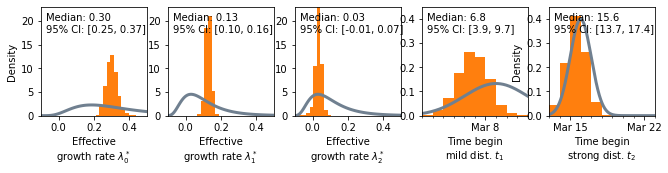

In [4]:
fig, axes = plt.subplots(1, 5, figsize=(11, 2))
rasterization_zorder = -1

trace = traces[2]

prio_style = {
    "color": "#708090",
    "linewidth": 3,
    "label": "Prior",
}

post_style = {
    "density": True,
    "color": "tab:orange",
    "label": "Posterior",
    'alpha':1,
    "zorder": -2,
}

limit_lambda = (-0.1, 0.5)
bins_lambda = np.linspace(*limit_lambda, 30)

# LAM 0
ax = axes[0]
ax.hist(trace.lambda_0 - trace.mu, bins=bins_lambda, **post_style)
x = np.linspace(*limit_lambda, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x + 1 / 8, scale=0.4, s=0.5), **prio_style)
ax.set_xlim(*limit_lambda)
ax.set_ylabel("Density")
ax.set_xlabel("Effective\ngrowth rate $\lambda_0^*$")
ax.text(
    0.05,
    0.95,
    print_median_CI(trace.lambda_0 - trace.mu, prec=2),
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
)
ax.set_ylim(0, 23)

# LAM 1
ax = axes[1]
ax.hist(trace.lambda_1 - trace.mu, bins=bins_lambda, **post_style)
x = np.linspace(*limit_lambda, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x + 1 / 8, scale=0.2, s=0.5), **prio_style)
ax.set_xlim(*limit_lambda)
ax.set_xlabel("Effective\ngrowth rate $\lambda_1^*$")
ax.text(
    0.05,
    0.95,
    print_median_CI(trace.lambda_1 - trace.mu, prec=2),
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
)
ax.set_ylim(0, 23)

# LAM 2
ax = axes[2]
ax.hist(trace.lambda_2 - trace.mu, bins=bins_lambda, **post_style)
x = np.linspace(*limit_lambda, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x + 1 / 8, scale=0.2, s=0.5), **prio_style)
ax.set_xlim(*limit_lambda)
ax.set_xlabel("Effective\ngrowth rate $\lambda_2^*$")
ax.text(
    0.05,
    0.95,
    print_median_CI(trace.lambda_2 - trace.mu, prec=2),
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
)
ax.set_ylim(0, 23)

# TIME 1
ax = axes[3]
dates_mild = conv_time_to_mpl_dates(trace.transient_begin_0)
limits = matplotlib.dates.date2num(
    [datetime.date(2020, 3, 2), datetime.date(2020, 3, 12)]
)
bins = np.arange(limits[0], limits[1] + 1)
ax.hist(dates_mild, bins=bins, **post_style)
x = np.linspace(*limits, num=1000)
ax.plot(
    x,
    scipy.stats.norm.pdf(
        x, loc=matplotlib.dates.date2num([prior_date_mild_dist_begin])[0], scale=3
    ),
    **prio_style,
)
ax.set_xlim(limits[0], limits[1])
ax.set_xlabel("Time begin\nmild dist. $t_1$")
text = print_median_CI(
    dates_mild - matplotlib.dates.date2num(datetime.datetime(2020, 3, 1)) + 1,
    prec=1,
)
ax.text(
    0.05,
    0.95,
    text,
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
)
ax.xaxis.set_major_locator(
    matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU)
)
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
ax.set_ylim(0, 0.45)

# TIME 2
ax = axes[4]
dates_strong = conv_time_to_mpl_dates(trace.transient_begin_1)
limits = matplotlib.dates.date2num(
    [datetime.date(2020, 3, 13), datetime.date(2020, 3, 23)]
)
bins = np.arange(limits[0], limits[1] + 1)
ax.hist(
    dates_strong, bins=bins, **post_style
)
# limits = ax.get_xlim()
x = np.linspace(*limits, num=1000)
ax.plot(
    x,
    scipy.stats.norm.pdf(
        x, loc=matplotlib.dates.date2num([prior_date_strong_dist_begin])[0], scale=1
    ),
    **prio_style,
)
ax.set_xlim(limits[0], limits[1])
ax.set_ylabel("Density")
ax.set_xlabel("Time begin\nstrong dist. $t_2$")
text = print_median_CI(
    dates_strong - matplotlib.dates.date2num(datetime.datetime(2020, 3, 1)) + 1,
    prec=1,
)
ax.text(
    0.05,
    0.95,
    text,
    horizontalalignment="left",
    verticalalignment="top",
    transform=ax.transAxes,
)
# ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_locator(
    matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.SU)
)
ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
ax.set_ylim(0, 0.45)
ax.set_xlim(limits[0], limits[1])

#for ax in axes:
#    ax.set_rasterization_zorder(rasterization_zorder)

fig.savefig(path_to_save + "Fig_summary_distributions.png", dpi=300)
fig.savefig(path_to_save + "Fig_summary_distributions.pdf", dpi=300)